<a href="https://colab.research.google.com/github/matchbou/Public/blob/master/PyTorch%20%E3%81%A6%E3%82%99%20MNIST%20on%20Google%20Colab%20with%20GPU-202008121656.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://qiita.com/knyrc/items/0a0092b9903b97fb41b4


In [ ]:
## 0. PyTorch と scikit-learn のインストール

!pip install torch torchvision
!pip install scikit-learn

In [ ]:
# 1. ライブラリインポートと学習データのダウンロード

import torch
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255
y = [float(s) for s in y]

3


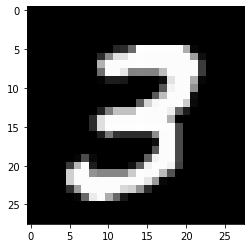

In [ ]:
# 学習データの表示例

plt.imshow(X[7].reshape(28,28), cmap=plt.cm.gray)
print("{:.0f}".format(y[7]))

In [ ]:
# 2. DataLoader作成

from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)

print(type(y_train[0]))

X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

<class 'float'>


In [ ]:
# 3. ネットワーク構築

from torch import nn

model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

model.to(device)
print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [ ]:
# 4. 誤差関数と最適化手法の設定

from torch import optim

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
# 5. 学習の設定

def train(epoch):
  model.train()

  for data, targets in loader_train:
    data, targets = data.cuda(), targets.cuda()

    optimizer.zero_grad()
    outputs = model(data)
    loss = loss_fn(outputs, targets)

    loss.backward()
    optimizer.step()

  print("epoch{}:終了\n".format(epoch))

In [ ]:
# 6. 推論の設定

def test():
  model.eval()
  correct = 0

  with torch.no_grad():
    for data, targets in loader_test:
      data, targets = data.cuda(), targets.cuda()

      outputs = model(data)

      _, predicted = torch.max(outputs.data, 1)
      correct += predicted.eq(targets.data.view_as(predicted)).sum()

  data_num = len(loader_test.dataset)
  print('\nテストデータの正解率：{}/{}({:.0f}%)\n'.format(correct, data_num, 100. * correct /data_num))

In [ ]:
# 学習前のテストデータ正解率

test()


テストデータの正解率：843/10000(8%)



In [ ]:
# 7. 学習後のテストデータ正解率

for epoch in range(3):
  train(epoch)

test()

epoch0:終了

epoch1:終了

epoch2:終了


テストデータの正解率：9592/10000(96%)



予測結果は2
この画像データの正解ラベルは2です


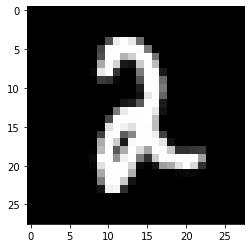

In [ ]:
# 8. 2019番目データの予測と正解結果の確認

index = 2019

model.eval()
data = X_test[index]
data = data.cuda()
output = model(data)
_, predicted = torch.max(output.data, 0)

print("予測結果は{}".format(predicted))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap='gray')
print("この画像データの正解ラベルは{:.0f}です".format(y_test[index]))

In [ ]:
# 利用した PyTorch のバージョン

print(torch.__version__)

1.6.0+cu101
